<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/Final/Gradientbootignregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GradientBoostingRegressor**

In [1]:
import pandas as pd
from glob import glob

files = glob('FLX*')

dataframes = []

columns = ["SW_IN_F","LW_IN_F", "PA_F", "WS_F", "VPD_F", "temperature_2m", "total_precipitation_sum", "LE_CORR"]

for file in files:
    df = pd.read_excel(file, usecols=columns, header=0)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df = combined_df[combined_df["LE_CORR"] != -9999]

X = combined_df.drop("LE_CORR", axis=1)
y = combined_df["LE_CORR"].values.reshape(-1, 1)

print(type(X))

Number of values with -9999 in LE_CORR: 121
<class 'pandas.core.frame.DataFrame'>


In [2]:
X

,SW_IN_F,LW_IN_F,VPD_F,PA_F,WS_F,temperature_2m,total_precipitation_sum
0,103.330,295.435,0.803,99.659,1.033,279.555888,8.320000e-05
1,120.125,272.751,1.355,100.435,1.093,278.457296,5.820000e-04
2,116.812,284.339,2.715,100.976,0.823,278.608387,4.410000e-07
3,37.592,309.736,1.482,100.996,0.680,279.167382,1.650000e-04
4,123.604,264.920,4.161,100.458,1.685,280.145327,3.000000e-06
...,...,...,...,...,...,...,...
17525,112.612,249.044,3.677,99.925,2.162,278.453498,0.000000e+00
17526,118.464,260.569,3.784,99.787,1.796,279.550817,8.550000e-07
17527,85.694,262.845,2.046,99.404,1.743,278.407350,2.170000e-05
17528,120.481,229.190,5.218,99.356,3.615,279.951721,1.010000e-04


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of StandardScaler
scaler = MinMaxScaler()

# Scale the X DataFrame
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#y = y.reshape(len(y), 1)
y = scaler.fit_transform(y)
print(type(y))

<class 'numpy.ndarray'>


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict, GridSearchCV, learning_curve, validation_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [10]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
reg = ensemble.GradientBoostingRegressor(**params)
y_train = y_train.ravel()
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0048


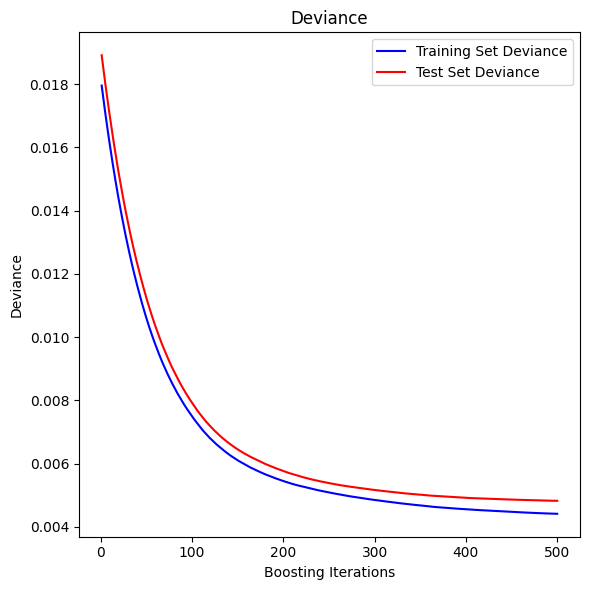

In [11]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

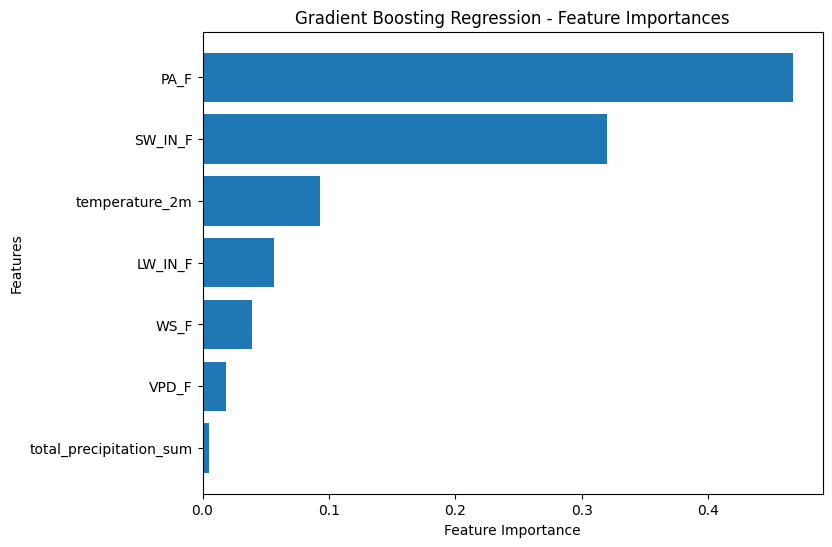

In [12]:
# Step 4: Retrieve the Feature Importances
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Regression - Feature Importances')
plt.show()

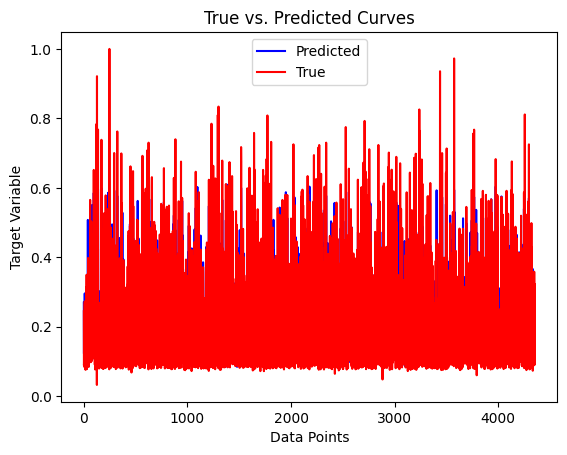

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(y_pred, c='b', label='Predicted')
ax.plot(y_test, c='r', label='True')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.legend()
plt.title('True vs. Predicted Curves')
plt.show()

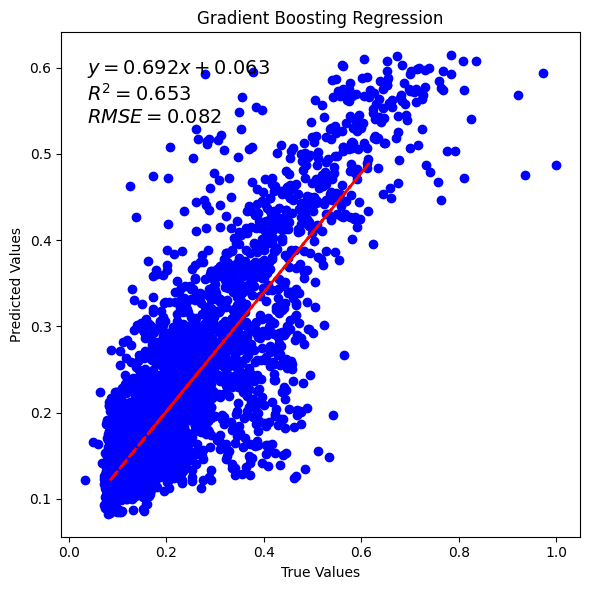

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.scatter(y_test.flatten(), y_pred, c='b')

# Polynomial Fit Line
z = np.polyfit(y_test.flatten(), y_pred, 1)
poly_fit = np.poly1d(z)
y_hat = poly_fit(y_pred)
plt.plot(y_pred, y_hat, "r--", lw=2)
text = f"$y = {z[0]:0.3f}x {z[1]:+0.3f}$\n$R^2 = {r2_score(y_test.flatten(), y_hat):0.3f}$\n" \
       f"$RMSE = {mean_squared_error(y_test.flatten(), y_hat, squared=False):0.3f}$"
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='top')

plt.title('Gradient Boosting Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()  # Adjust the layout

plt.show()

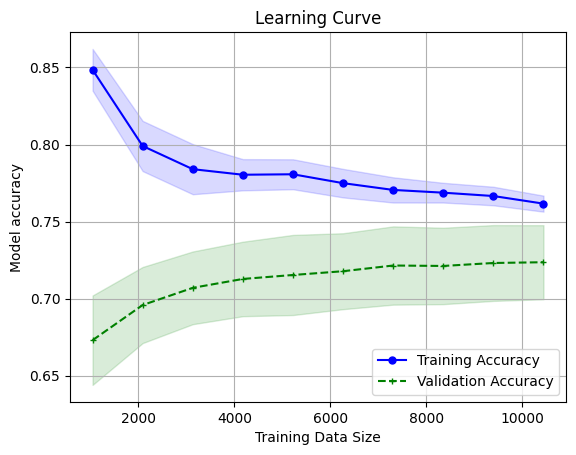

In [17]:
from sklearn.model_selection import learning_curve, validation_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=reg, X=X_train, y=y_train,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()